Elisa Stabilini - Matricola: 28326A

# Analisi dati - replay buffer

In questo notebook presento l'analisi dati relativa al training dell'algoritmo di reinforcement learning avvenuto con l'utilizzo di un replay buffer.
Durante il training per ogni step di ogni episodio sono state salvate anche tutte le informazioni relative all'agente e all'ambiente circostante per poter avere un quadro più dettagliato possibile del procedimento di apprendimento.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from pathlib import Path

### Analisi dati per 

In [2]:
Data_path = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/'
TrainedDQLearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Plots'
timename = '_20240811_091314'

In [3]:
TrainedDQLearning_data = Path('/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data')

rewards_file = Data_path + 'rewards' + timename + '.npy'
episode_length_file = Data_path + 'episode_length' + timename + '.npy'
episode_info_file = Data_path + 'episode_info' + timename + '.pkl'

In [4]:
# Load the numpy arrays
rewards = np.load(rewards_file)
episode_lengths = np.load(episode_length_file)

# Load the pickle file
with open(episode_info_file, 'rb') as file:
    episode_info = pickle.load(file)


In [5]:
#check episode_info length (should be the same as the number of episode used for training)
print(len(episode_info))

1000


In [6]:
# Initialize dictionaries to store the data
data = {
    "year": [],
    "budget": [],
    "sheep_count": [],
    "wheat_grown": [],
    "storm_occurred": [],
    "raw_reward": []
}

# Process the data
for episode in episode_info:
    for key in data.keys():
        if key in episode:
            data[key].append(episode[key])

# Convert lists to numpy arrays
for key in data.keys():
    data[key] = np.array(data[key])

Analysis to do:
1. plot episode length (should be 30 yrs for each episode)
2. plot the different infos for a random episode (to see the evolution of the training process)
3. plot the different infos for a random episode (to see the evolution of the training process)
4. plot all the info values for the complete training (all the values for all episodes of the training)
5. plot mean values of the info variable for all episodes
6. Try to make interactive plot that shows the proceedings of the training

**NOTE:** all the plots must be saved in an appropriate way:
* plots folder
* same name as the model that has been used for the training


### 1. Episode length and episode rewards analysis

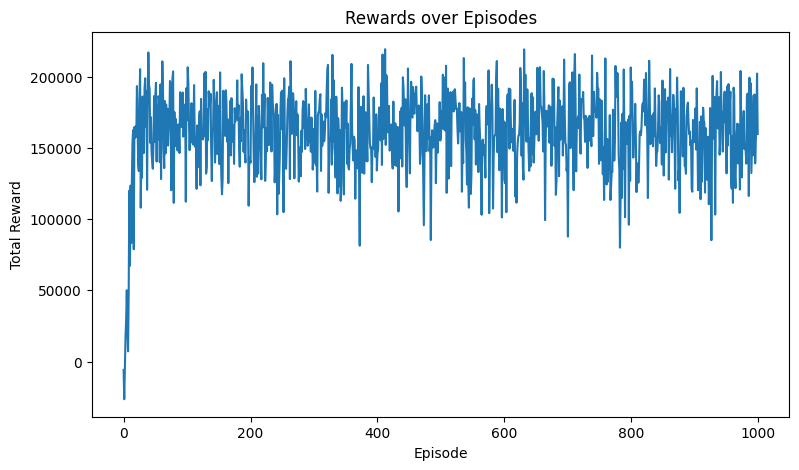

In [7]:
# Plot rewards
plt.figure(figsize=(9, 5))
plt.plot(rewards)
plt.title('Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

imagefile = 'rewards' + timename + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

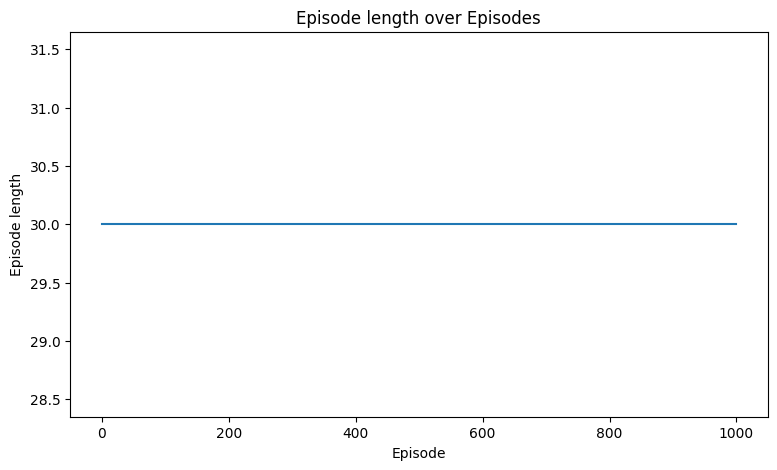

In [8]:
# Plot episode length
plt.figure(figsize=(9, 5))
plt.plot(episode_lengths)
plt.title('Episode length over Episodes')
plt.xlabel('Episode')
plt.ylabel('Episode length')

imagefile = 'ep_length' + timename + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

### Plot info across episode for a random episode